<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/Quartile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
slope = pd.read_excel('/content/drive/MyDrive/Thesis Project Kidney/Assign/Assign 3: Re-CountSlope & Quartile/LabSlope.xlsx')
slope.head()

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slopes
0,2299,3640924,66.8,2016-11-11 09:40:06.053,87,NaN
1,2299,4020970,67.2,2017-03-31 10:18:54.363,140,0.002857
2,2299,4286612,69.2,2017-07-05 10:40:40.763,96,0.020833
3,2299,4546471,63.6,2017-10-03 09:19:54.710,89,-0.062921
4,2299,4801938,58.4,2018-01-04 09:03:28.847,92,-0.056522


In [ ]:
slope.isnull().any()

PatientUID         False
PatientVisitUID    False
ResultValue        False
datetime           False
TimeDiff           False
Slopes              True
dtype: bool

In [ ]:
slope[slope['Slopes'].isnull()] # only the fisrt row

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slopes
0,2299,3640924,66.8,2016-11-11 09:40:06.053,87,NaN


In [ ]:
slope.columns

Index(['PatientUID', 'PatientVisitUID', 'ResultValue', 'datetime', 'TimeDiff',
       'Slopes'],
      dtype='object')

# **2**

In [ ]:
import numpy as np

In [ ]:
# Desired quartiles and median
desired_Q1 = -0.06 #[-inf,-1)
desired_Q2 = 0.0   #[-1, 0)
desired_Q3 = 0.06  #(0, 1]
desired_Q4 =       #(1, inf)

# Create a function to categorize the slopes
def categorize_slope(s):
    if s <= desired_Q1:
        return 'Q1'
    elif desired_Q1 < s <= desired_Q2:
        return 'Q2'
    elif desired_Q2 < s <= desired_Q3:
        return 'Q3'
    else:
        return 'Q4'

# Apply the categorization function to create a new column
slope['SlopeCategory'] = slope['Slopes'].apply(categorize_slope)

In [ ]:
slope

,PatientUID,PatientVisitUID,ResultValue,datetime,TimeDiff,Slopes,SlopeCategory
0,2299,3640924,66.80,2016-11-11 09:40:06.053,87,NaN,Q4
1,2299,4020970,67.20,2017-03-31 10:18:54.363,140,0.002857,Q3
2,2299,4286612,69.20,2017-07-05 10:40:40.763,96,0.020833,Q4
3,2299,4546471,63.60,2017-10-03 09:19:54.710,89,-0.062921,Q1
4,2299,4801938,58.40,2018-01-04 09:03:28.847,92,-0.056522,Q1
...,...,...,...,...,...,...,...
280094,3409733,10435209,49.13,2023-03-02 09:24:57.310,83,-0.208313,Q1
280095,3432056,10235244,48.51,2023-01-09 12:31:53.220,25,0.168400,Q4
280096,3432056,10306813,67.71,2023-01-27 12:22:43.000,17,1.129412,Q4
280097,3432056,10408954,68.69,2023-02-24 21:05:12.747,28,0.035000,Q4


## **check**

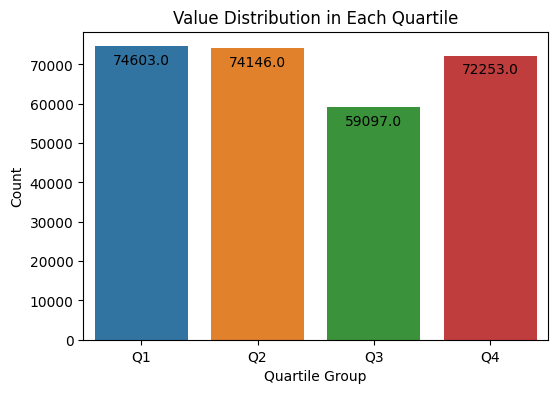

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

quartile_counts = slope['SlopeCategory'].value_counts()
desired_order = ['Q1', 'Q2', 'Q3', 'Q4']

# Step 2: Create a bar plot to visualize the quartile distribution with actual counts on top of each bar
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=quartile_counts.index, y=quartile_counts.values, order=desired_order)
plt.xlabel('Quartile Group')
plt.ylabel('Count')
plt.title('Value Distribution in Each Quartile')

# Display the counts on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, -10), textcoords='offset points')
plt.show()

In [ ]:
slope.groupby('SlopeCategory')['Slopes'].agg(['min', 'max'])

,min,max
SlopeCategory,,
Q1,-13.10000,-0.06
Q2,-0.06000,0.00
Q3,0.00002,0.06
Q4,0.06000,29.70


In [ ]:
slope.groupby('SlopeCategory')['Slopes'].median()

SlopeCategory
Q1   -0.812321
Q2   -0.052941
Q3    0.059082
Q4    0.859630
Name: Slopes, dtype: float64

# **Excel**

In [ ]:
quartile = slope[['PatientUID','PatientVisitUID','ResultValue','datetime','Slopes','TimeDiff','SlopeCategory']]
quartile

,PatientUID,PatientVisitUID,ResultValue,datetime,Slopes,TimeDiff,SlopeCategory
0,2299,3640924,66.80,2016-11-11 09:40:06.053,NaN,87,Q4
1,2299,4020970,67.20,2017-03-31 10:18:54.363,0.002857,140,Q3
2,2299,4286612,69.20,2017-07-05 10:40:40.763,0.020833,96,Q3
3,2299,4546471,63.60,2017-10-03 09:19:54.710,-0.062921,89,Q1
4,2299,4801938,58.40,2018-01-04 09:03:28.847,-0.056522,92,Q2
...,...,...,...,...,...,...,...
280094,3409733,10435209,49.13,2023-03-02 09:24:57.310,-0.208313,83,Q1
280095,3432056,10235244,48.51,2023-01-09 12:31:53.220,0.168400,25,Q4
280096,3432056,10306813,67.71,2023-01-27 12:22:43.000,1.129412,17,Q4
280097,3432056,10408954,68.69,2023-02-24 21:05:12.747,0.035000,28,Q3


In [ ]:
quartile.to_excel("Quartile.xlsx", index=False)